In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [5]:
data = pd.read_csv('data/normalized_data')
data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,approved
0,1.0,1.0,1.0,0.0,0.258721,1.00,0.25,0.00,0.8,0.255676,0.288290,0.0,1.0,0.0,0.0,0.052632,1.0
1,1.0,1.0,1.0,0.0,0.258721,1.00,0.25,0.00,0.8,0.255676,0.288290,0.0,1.0,0.0,0.0,0.052632,1.0
2,1.0,1.0,1.0,0.0,0.055233,1.00,1.00,0.25,0.2,0.791768,0.071165,0.0,0.0,0.0,0.0,0.052632,1.0
3,0.0,0.0,1.0,0.0,0.156977,0.00,1.00,0.75,0.2,0.657929,0.193298,0.0,0.0,1.0,1.0,0.000000,1.0
4,0.0,0.0,1.0,0.0,0.156977,0.00,1.00,0.75,0.2,0.657929,0.193298,0.0,0.0,1.0,1.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,1.0,1.0,0.0,0.186047,1.00,1.00,0.25,0.2,0.558172,0.153096,0.0,0.0,0.0,0.0,0.052632,1.0
36453,0.0,0.0,1.0,0.0,0.084302,0.00,0.25,0.25,0.2,0.277303,0.083333,0.0,0.0,1.0,1.0,0.052632,0.0
36454,0.0,0.0,1.0,0.0,0.084302,0.25,0.25,0.25,0.2,0.277303,0.663326,0.0,0.0,1.0,1.0,0.052632,0.0
36455,0.0,0.0,1.0,0.0,0.165698,1.00,1.00,0.25,0.2,0.592708,0.040647,0.0,0.0,0.0,0.0,0.052632,1.0


In [6]:
# evaluate features with recursive feature elimination
logistic_regression = LogisticRegression()
rec_feature_elimination = RFE(logistic_regression, n_features_to_select=0.5)
rec_feature_elimination.fit(data.loc[:, data.columns != 'approved'], data.loc[:, 'approved'])
print(rec_feature_elimination.support_)
print(rec_feature_elimination.ranking_)

[ True False  True  True False  True False  True False False  True False
 False False  True  True]
[1 2 1 1 3 1 4 1 6 5 1 9 7 8 1 1]


In [7]:
columns = data.loc[:, data.columns != 'approved'].columns

# delete the 50% of feature with less predictability quality
for feature, support in zip(columns, rec_feature_elimination.support_):

    if not support:
        data.drop(feature, axis=1, inplace=True)

data

,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,FLAG_EMAIL,CNT_FAM_MEMBERS,approved
0,1.0,1.0,0.0,1.00,0.00,0.288290,0.0,0.052632,1.0
1,1.0,1.0,0.0,1.00,0.00,0.288290,0.0,0.052632,1.0
2,1.0,1.0,0.0,1.00,0.25,0.071165,0.0,0.052632,1.0
3,0.0,1.0,0.0,0.00,0.75,0.193298,1.0,0.000000,1.0
4,0.0,1.0,0.0,0.00,0.75,0.193298,1.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
36452,1.0,1.0,0.0,1.00,0.25,0.153096,0.0,0.052632,1.0
36453,0.0,1.0,0.0,0.00,0.25,0.083333,1.0,0.052632,0.0
36454,0.0,1.0,0.0,0.25,0.25,0.663326,1.0,0.052632,0.0
36455,0.0,1.0,0.0,1.00,0.25,0.040647,0.0,0.052632,1.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.approved, test_size=0.25, random_state=0)

In [9]:
model = logistic_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_pred, y_test)
metrics.confusion_matrix(y_test, y_pred)

array([[   0,   34],
       [   0, 9081]], dtype=int64)

### Resampling (SMOTE)
The confusion matrix shows that the model classifies every event as the majority class. Because this means the model is not able to recognize any of the majority instances, we
need to resample the data using the SMOTE technique. This increases the number of minority samples by creating synthetic samples based on the original samples.

In [10]:
smote = SMOTE(sampling_strategy=0.5, random_state=0, k_neighbors=5)

# resample data
res_X, res_y = smote.fit_resample(data.iloc[:, :-1], data.approved)
res_y.value_counts()

1.0    36290
0.0    18145
Name: approved, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(res_X, res_y, test_size=0.25, random_state=0)

In [23]:
model_list = [LogisticRegression(), KNeighborsClassifier(), SVC()]
ac_scores = []
cm_scores = []

for model in model_list:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac_scores.append(metrics.accuracy_score(y_test, y_pred))
    cm_scores.append(metrics.confusion_matrix(y_test, y_pred))


In [24]:
print(ac_scores)
print(cm_scores)

[0.6743331618781688, 0.91762804026747, 0.7193768829451098]
[array([[ 610, 3942],
       [ 490, 8567]], dtype=int64), array([[3726,  826],
       [ 295, 8762]], dtype=int64), array([[1582, 2970],
       [ 849, 8208]], dtype=int64)]


### KNN Classifier
We tested three different models without hyperparameter tuning on the dataset. The KNN model performed best while the other models remained significantly less accurate
Based on the results we will choose the KNN model to predict values.
In the next step we will tune the hyperparameters using grid search to optimize the model

In [29]:
# initialize plain knn model
knn_model = KNeighborsClassifier()
params_grid = dict(n_neighbors=list(range(1, 25)),
                   weights=['uniform', 'distance'])

# create grid
grid = GridSearchCV(knn_model, params_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=2)

# train model
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.9s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.7s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.3s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.2s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.8s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.9s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.9s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.5s
[CV] END ....................n_neighbors=1, weights=distance; total time=   1.4s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   2.4s
[CV] END .....................n_neighbors=2, we

In [34]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 1, 'weights': 'uniform'}
0.9350905244048816


In [39]:
# apply optimized params on knn and test model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(f"Accuracy of the model is: {round(metrics.accuracy_score(y_test, y_pred), 2)}")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

Accuracy of the model is: 0.94


Text(0.5, 1.0, 'Confusion Matrix KNN Model 94% Accuracy')

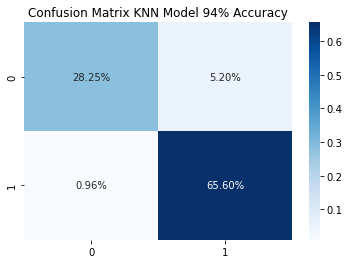

In [45]:
heat = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

heat.set_title('Confusion Matrix KNN Model 94% Accuracy')

In [47]:
# export trained & tested model with pickle
with open('credit_approval_knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [48]:
# with open('credit_approval_knn_model.pkl', 'rb') as file:
#    test_model = pickle.load(file)

In [51]:
'''
# safe test the model
y_pred = test_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
'''

0.9384965831435079